In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_raw_inline(raw, title, n_channels=10, duration_sec=5):
    """
    Plot the first n_channels from an MNE Raw object inline in Jupyter notebook.

    Parameters:
        raw (mne.io.Raw): The raw EEG data.
        n_channels (int): Number of channels to plot.
        duration_sec (int): Duration in seconds to display.
    """
    sfreq = int(raw.info['sfreq'])
    n_samples = min(sfreq * duration_sec, raw.n_times)

    data, times = raw[:n_channels, :n_samples]

    plt.figure(figsize=(15, 6))
    for i in range(n_channels):
        plt.plot(times[:n_samples], data[i, :n_samples] * 1e6 + i * 50, label=raw.ch_names[i])  # µV + offset
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude + Offset (µV)')
    plt.title(title)
    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()

# plot_raw_inline(raw, n_channels=10, duration_sec=5)

Skip files  ['session1_sub1_twist_MI', 'session2_sub12_twist_MI', 'session2_sub25_twist_MI', 'session1_sub7_twist_MI', 'session1_sub20_twist_MI', 'session2_sub5_twist_MI', 'session1_sub5_twist_MI', 'session1_sub21_twist_MI', 'session2_sub1_twist_MI', 'session3_sub13_twist_MI', 'session1_sub3_twist_MI', 'session3_sub12_twist_MI', 'session2_sub9_twist_MI', 'session3_sub4_twist_MI', 'session1_sub25_twist_MI', 'session2_sub15_twist_MI', 'session3_sub5_twist_MI', 'session3_sub3_twist_MI', 'session1_sub6_twist_MI', 'session3_sub18_twist_MI', 'session2_sub16_twist_MI', 'session3_sub8_twist_MI', 'session2_sub24_twist_MI', 'session1_sub11_twist_MI', 'session1_sub18_twist_MI', 'session2_sub3_twist_MI', 'session2_sub20_twist_MI', 'session2_sub18_twist_MI', 'session1_sub2_twist_MI', 'session3_sub16_twist_MI', 'session2_sub19_twist_MI', 'session3_sub22_twist_MI', 'session2_sub23_twist_MI', 'session3_sub23_twist_MI', 'session2_sub17_twist_MI', 'session1_sub23_twist_MI', 'session2_sub14_twist_MI', 's

/tmp/ipykernel_700760/1318021387.py:57: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_700760/1318021387.py:57: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_700760/1318021387.py:57: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


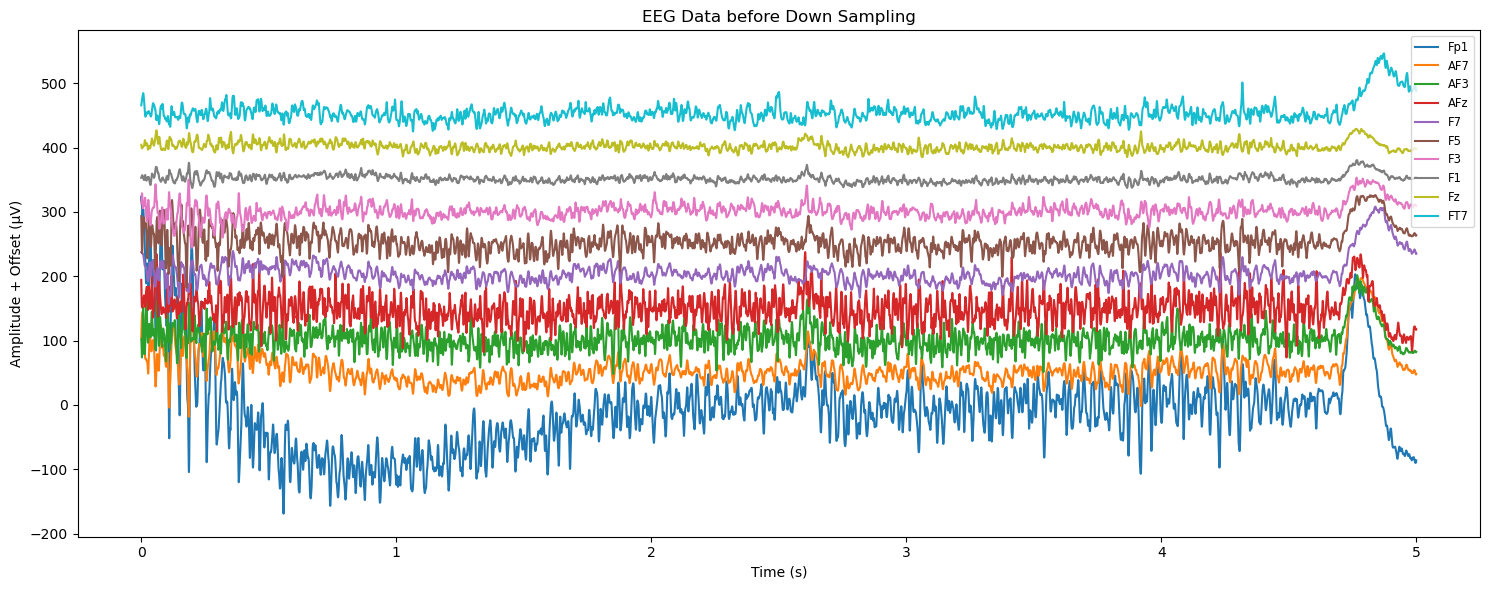

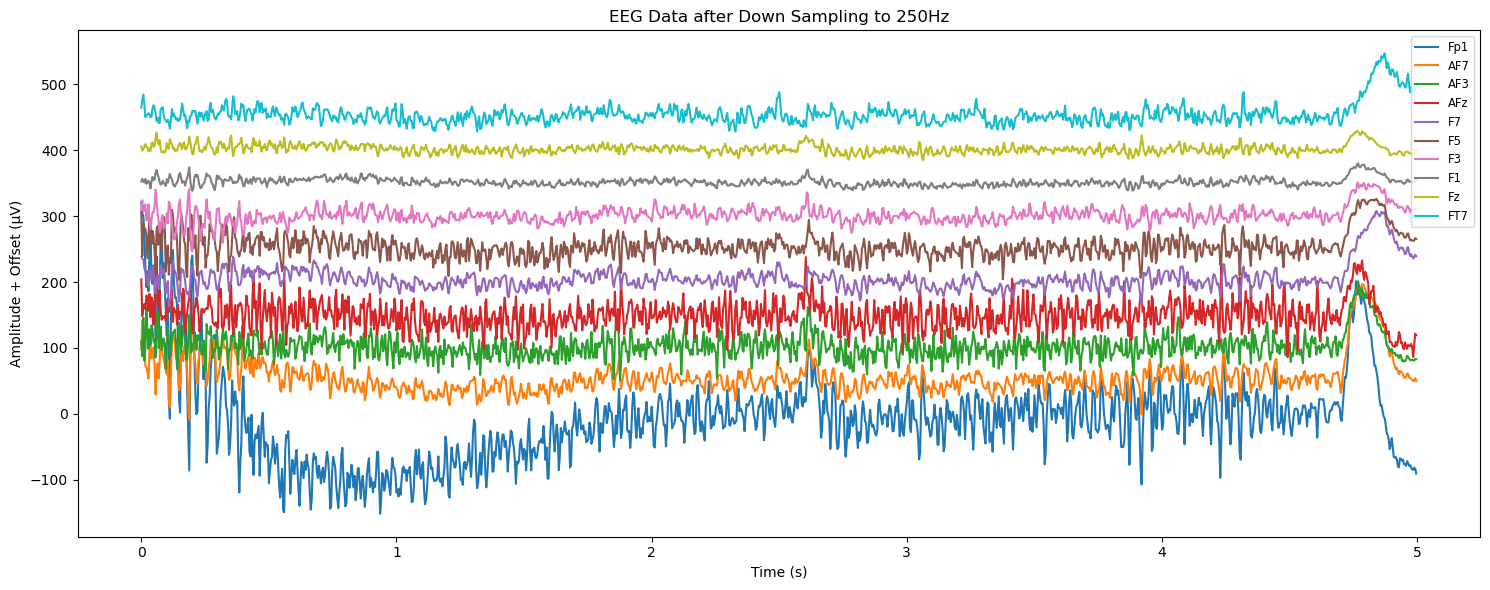

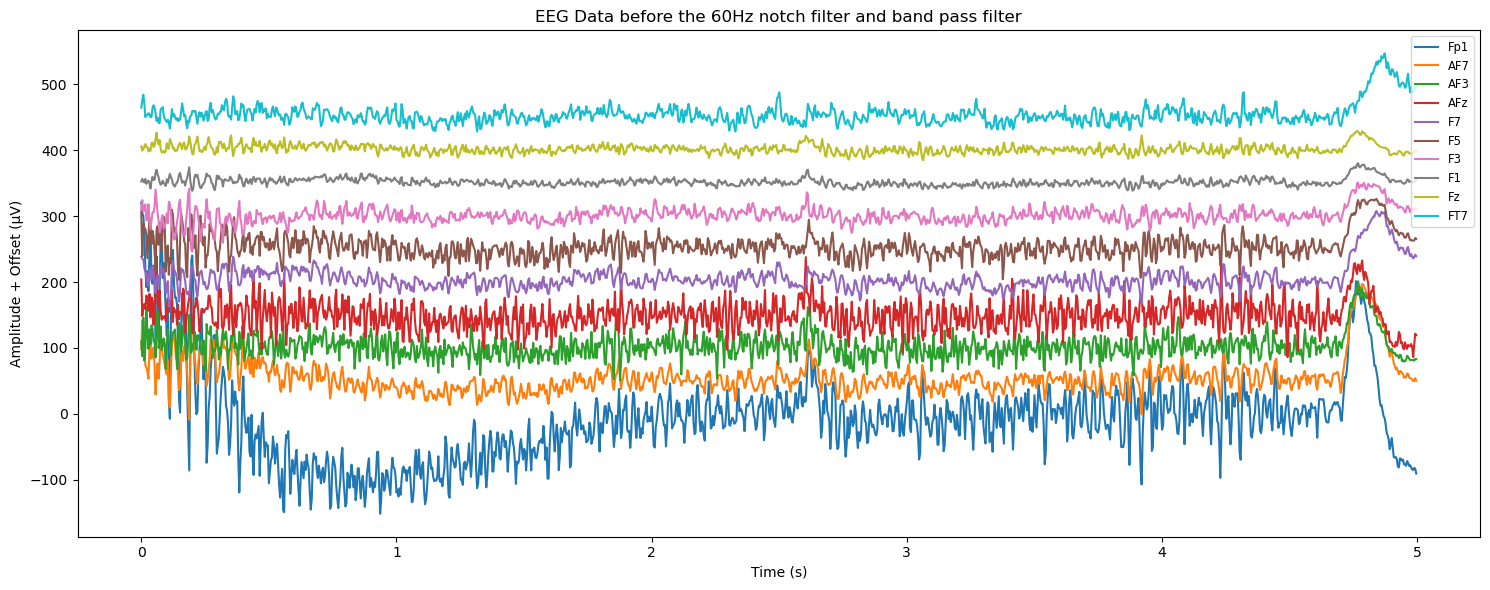

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


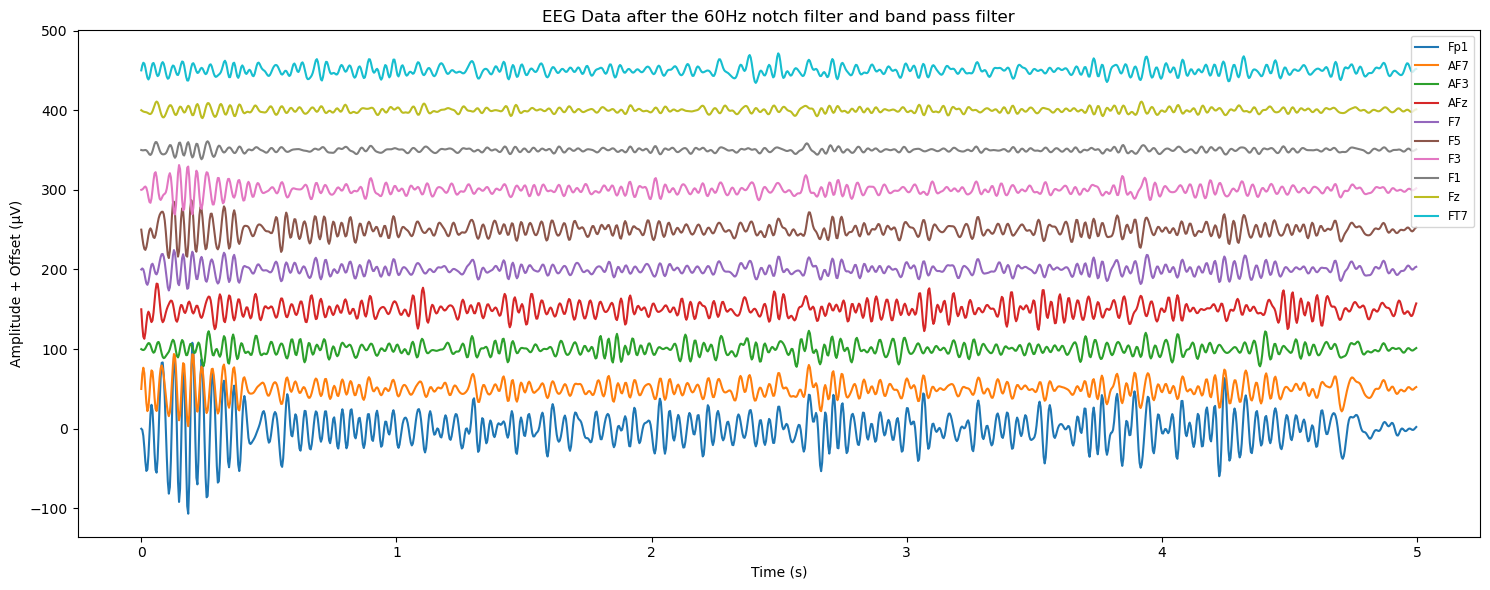

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 60 PCA components
Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 1001 original time points ...
0 bad epochs dropped


In [5]:
import os
import glob
import numpy as np
import mne
import gc
import time
from sklearn.preprocessing import StandardScaler


# ---------- Paths ----------
eeg_data = '/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata'
output_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/NeuroGPT_preprocess3'
os.makedirs(output_dir, exist_ok=True)

# Delete the output directory if it exists
# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

# # Create a new empty output directory
# os.makedirs(output_dir)

# ---------- Files to skip ----------
# skip_files = ['session3_sub13', 'session1_sub23', 'session2_sub7', 'session2_sub12', 'session2_sub6']
# skip_files = [] 
# all_vhdr_files = glob.glob(os.path.join(eeg_data, '*.vhdr'))
# # vhdr_paths = [f for f in all_vhdr_files if 'Move' not in os.path.basename(f) and all(skip not in f for skip in skip_files)]
# vhdr_paths = [f for f in all_vhdr_files]



# ---------- Files to skip based on existing output ----------
existing_npz_files = glob.glob(os.path.join(output_dir, '*.npz'))
skip_files = [os.path.splitext(os.path.basename(f))[0] for f in existing_npz_files]

skip_files.append('session1_sub17_twist_MI')
skip_files.append('session1_sub14_twist_MI')

print("Skip files ", skip_files)

# ---------- Collect all input .vhdr files ----------
all_vhdr_files = glob.glob(os.path.join(eeg_data, '*.vhdr'))
vhdr_paths = [
    f for f in all_vhdr_files
    if os.path.splitext(os.path.basename(f))[0] not in skip_files and 'Move' not in os.path.basename(f)
]

vhdr_paths = ['/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub19_twist_MI.vhdr']


# ---------- Class mapping ----------
wrist_events = {'pronation': 91, 'supination': 101}

# ---------- Process each file ----------
for vhdr_path in vhdr_paths:
    try:
        print(f"\n🧠 Processing: {vhdr_path}")
        raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)

        # Drop EOG & EMG channels
        raw.drop_channels([ch for ch in raw.ch_names if 'EOG' in ch or 'EMG' in ch])

        # Crop to reduce memory usage (optional: adjust tmax based on your needs)
        # raw.crop(tmin=0, tmax=180)  # First 3 minutes only

        plot_raw_inline(raw, n_channels=10, duration_sec=5, title = 'EEG Data before Down Sampling')

        # Downsample early to save memory
        raw.resample(250, npad="auto")

        plot_raw_inline(raw, n_channels=10, duration_sec=5, title = 'EEG Data after Down Sampling to 250Hz')

        # Identify bad channels and intepollate them
        # raw_copy = raw.copy()
        # raw_copy.pick_types(eeg=True)
        # raw_copy.set_eeg_reference('average', projection=True)
        # auto_bad = mne.preprocessing.annotate_amplitude(raw_copy, peak=None, flat=1e-6, bad_percent=5.0)
        # raw.set_annotations(auto_bad)
        # raw.info['bads'] = list(set(raw.info['bads']) | set(auto_bad[1]))  # Merge bads
        # raw.interpolate_bads(reset_bads=False)

        plot_raw_inline(raw, n_channels=10, duration_sec=5, title = 'EEG Data before the 60Hz notch filter and band pass filter')
        # Filter
        raw.notch_filter(freqs=[60])
        raw.filter(8, 30, fir_design='firwin')

        plot_raw_inline(raw, n_channels=10, duration_sec=5, title = 'EEG Data after the 60Hz notch filter and band pass filter')

        plot_raw_inline(raw, n_channels=10, duration_sec=5, title = 'EEG Data before ICA')

        # ICA on cropped data for efficiency
        ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter='auto')
        ica.fit(raw.copy().crop(tmax=30))  # Only first 60s for fitting
        raw = ica.apply(raw)

        plot_raw_inline(raw, n_channels=10, duration_sec=5, title = 'EEG Data after ICA')

        
        # Extract events
        events, event_id = mne.events_from_annotations(raw)

        # Epoching
        epochs = mne.Epochs(
            raw, events, event_id=wrist_events,
            tmin=-1, tmax=3.0,
            baseline=(None, 0),
            preload=True,
            reject=dict(eeg=250e-6),  # Remove high amplitude artifacts
            reject_by_annotation=True
        )

        if len(epochs) == 0:
            print(f"⚠️ All epochs rejected for {vhdr_path}")
            continue

        # Extract data and labels
        X = epochs.get_data().astype(np.float32)  # (n_epochs, n_channels, n_times)
        y = np.array([0 if ev[-1] == 91 else 1 for ev in epochs.events], dtype=np.int8)

        # Standardize channel-wise
        for i in range(X.shape[0]):
            X[i] = StandardScaler().fit_transform(X[i].T).T

        # Save
        # filename = os.path.splitext(os.path.basename(vhdr_path))[0]
        # np.savez_compressed(os.path.join(output_dir, f"{filename}.npz"), X=X, y=y)

        # print(f"✅ Saved: {filename}.npz | Shape: {X.shape}")

        # Cleanup
        del raw, epochs, X, y, ica
        gc.collect()
        time.sleep(2)  # Allow time for memory to clean up

    except Exception as e:
        print(f"❌ Error processing {vhdr_path}: {e}")
